In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from scipy import interpolate
from scipy.optimize import curve_fit

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [94]:
def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B

def points_d(table, freq=1, smooth_width=None):
    r = table['t']
    res = 1/(2*np.diff(list(r)))*freq
    res = fill_nan(res)
    r = fill_nan(np.array(r))
    return r[:-1], uniform_filter1d(res, smooth_width) if smooth_width else res

def points(table):
    r = table['t']
    return list(r), range(len(r))
#%matplotlib widget

def plot_coords(data, name=None, title='', sm_w=3, freq=1, approx=None, axes=None, label="Измерение", approx_labeler=None, rounding=3):
    if axes is None:
        fig = plt.figure(figsize=(10, 7))

        axes = fig.subplots(2)
    
        axes[0].set_title(title)
    data['t'] -= data['t'].iloc[0]
    axes[0].plot(*points(data),  '.-')
    axes[0].set_ylabel('Число оборотов')
    axes[0].set_xlabel('Время, с')

    
    axes[1].set_ylabel('Частота, Гц')
    axes[1].set_xlabel('Время, с')
    speed = points_d(data, smooth_width=sm_w, freq=freq)
    axes[1].plot(*speed, '.-', label=label)
    axes[1].set_ylim(bottom=0)
    
    if name and (axes is None): fig.savefig("img/" + name + '.png')
    if approx:
        res, err = curve_fit(approx, *speed)
        axes[1].plot(speed[0], approx(speed[0], *res), ':', label="Аппроксимация" if approx_labeler is None else approx_labeler(*np.round(res, rounding)))
        axes[1].legend()
        return res

array([0.33665191])

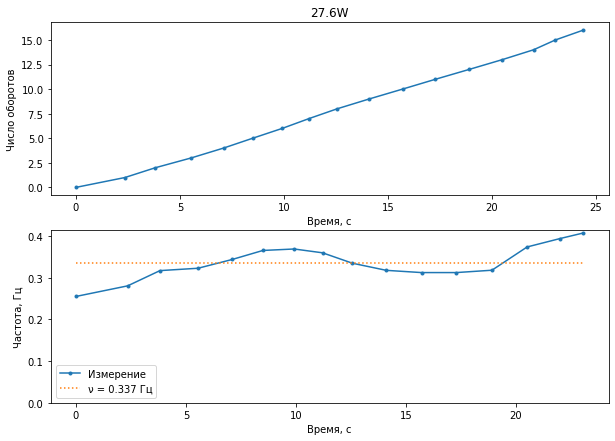

In [80]:
plot_coords(pd.read_csv("data/η", delimiter=";", comment = "#"), 'η', title='27.6W', approx=lambda x, C: x*0 + C, approx_labeler=lambda C: f"ν = {C} Гц")

array([0.40112962])

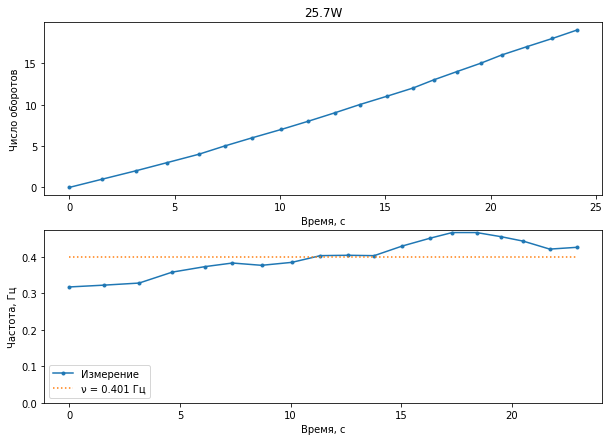

In [81]:
plot_coords(pd.read_csv("data/n2", delimiter=";", comment = "#"), 'η2', "25.7W", approx=lambda x, C: x*0 + C, approx_labeler=lambda C: f"ν = {C} Гц")

array([0.05472932, 0.5574653 ])

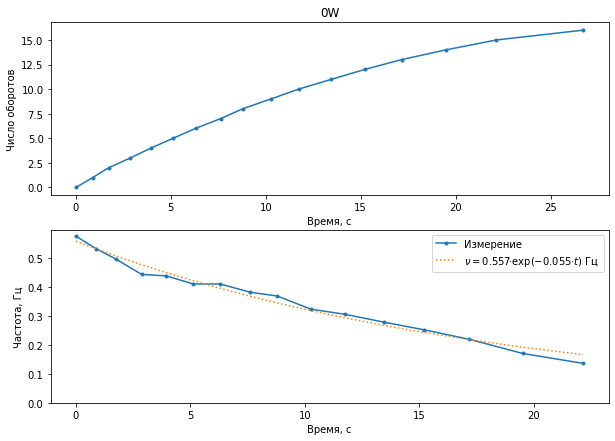

In [82]:

plot_coords(pd.read_csv("data/Торможение прогресса", delimiter=";", comment = "#"), 'Тормоз', "0W",
            approx=lambda x, B, C: C*np.exp(-B*x), approx_labeler=lambda B, C: f"$ν = {C} · \exp(-{B}·t)$ Гц")

array([0.42446957])

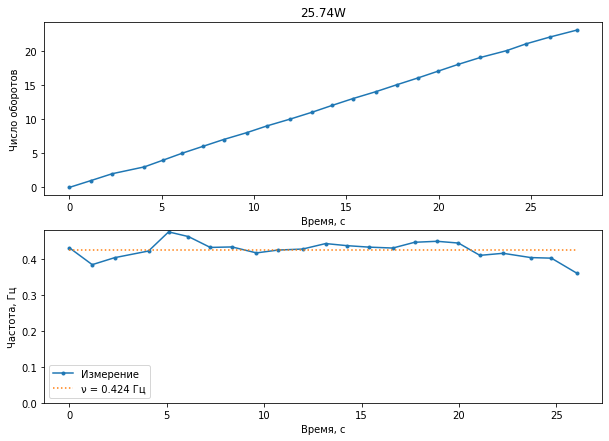

In [83]:
plot_coords(pd.read_csv("data/Загадочное измерение", delimiter=";", comment = "#"), 'Тормоз', "25.74W",
           approx=lambda x, C: x*0 + C, approx_labeler=lambda C: f"ν = {C} Гц")

array([0.02234491, 0.1677234 ])

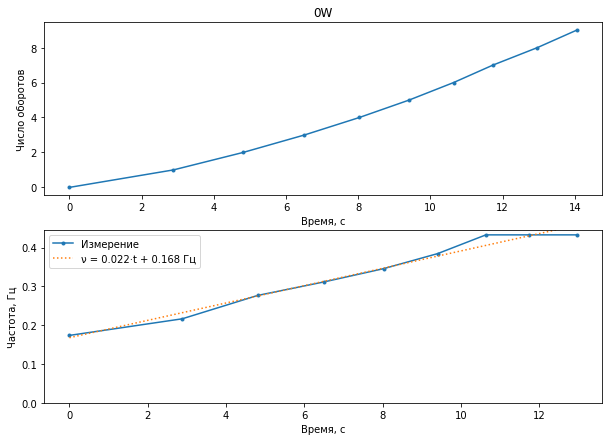

In [84]:

plot_coords(pd.read_csv("data/Взеты и паденения Османскорй империи", delimiter=";", comment = "#"), 'Падение', "0W", sm_w=2,
           approx=lambda x, B, C: B*x + C, approx_labeler=lambda B, C: f"ν = {B}·t + {C} Гц")

In [85]:
rots = pd.read_csv("data/Обороты", delimiter=";", comment = "#")

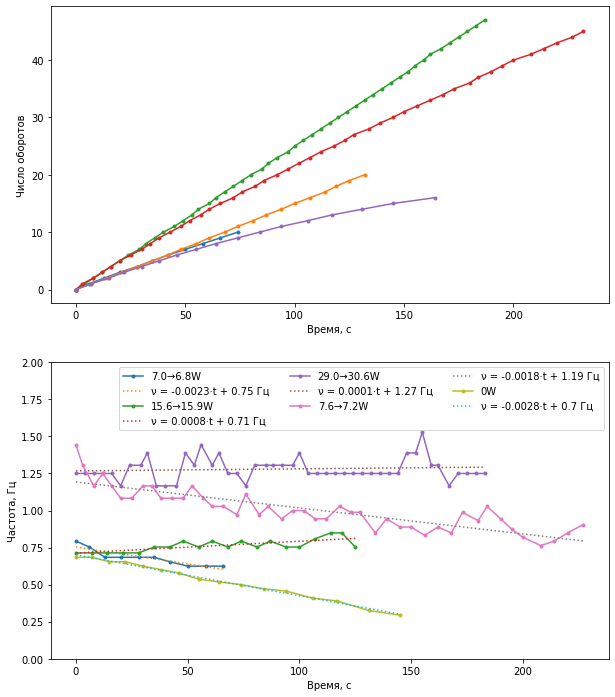

In [86]:
import re
names = ['7.0→6.8W', '15.6→15.9W', '29.0→30.6W', '7.6→7.2W', '0W']
def convert_time(s):
    if type(s) == float: return s
    t = re.match("(-?\d\d?):(\d\d(.\d+)?)", s)
    if t == None:
        return float(s)
    t = t.groups()
    return int(t[0])*60 + float(t[1])


fig = plt.figure(figsize=(10, 12))
axes = fig.subplots(2)

for i, j in zip(rots.groupby('n'), names):
    i = i[1]
    i['t'] = i['time'].apply(convert_time)
    plot_coords(i, axes=axes, freq=10, approx=lambda x, B, C: B*x + C, label=j, approx_labeler=lambda B, C: f"ν = {B}·t + {round(C, 2)} Гц", rounding=4)
axes[1].set_ylim(bottom=0, top = 2)
axes[1].legend(loc=1, ncol=3)
# plt.legend()
#    plt.plot(*points_d(i, freq=10))
plt.savefig('img/coords.png')

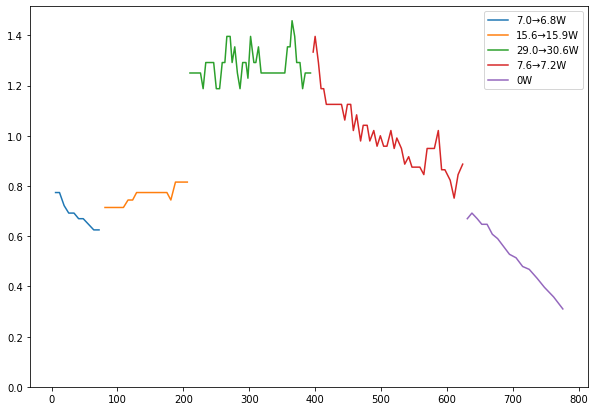

In [87]:


plt.figure(figsize=(10, 7))
t = 0
c = 0

for i in rots.groupby('n'):
    i = i[1]
    
    i['t'] = i['time'].apply(convert_time) + t
    t += np.array(i['t'])[-1] - np.array(i['t'])[0]
    plt.plot(*points_d(i, freq=10, smooth_width=4), label=names[c])
    c += 1
plt.legend()
plt.ylim(bottom=0)
plt.savefig('img/speeds.png')

array([0.02267385, 0.40872626])

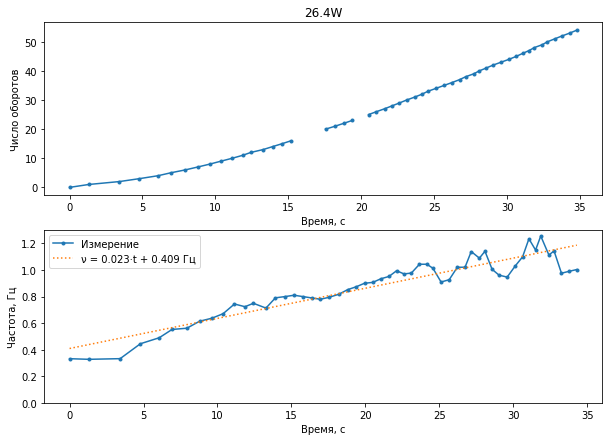

In [88]:
plot_coords(pd.read_csv("data/раскрутка_1", delimiter=";", comment = "#"), 'Крут_1', "26.4W", approx=lambda x, B, C: B*x + C, approx_labeler=lambda B, C: f"ν = {B}·t + {C} Гц")

array([0.03101954, 0.4766204 ])

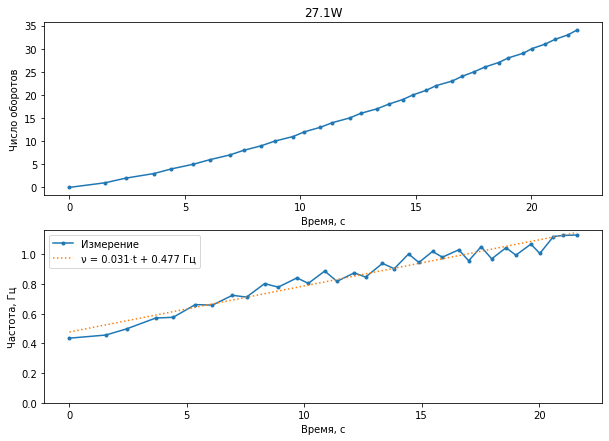

In [89]:
plot_coords(pd.read_csv("data/раскрутка_2", delimiter=";", comment = "#"), 'Крут_2', "27.1W", sm_w=5, approx=lambda x, B, C: B*x + C, approx_labeler=lambda B, C: f"ν = {B}·t + {C} Гц")

array([1.3171975])

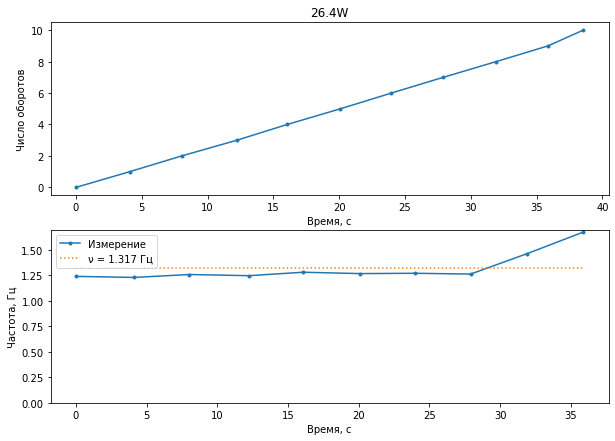

In [90]:
plot_coords(pd.read_csv("data/раскрутка_3", delimiter=";", comment = "#"), 'Крут_3', "26.4W", freq=10, approx=lambda x, C: x*0 + C, approx_labeler=lambda C: f"ν = {C} Гц")

array([-0.00707098,  0.77414743])

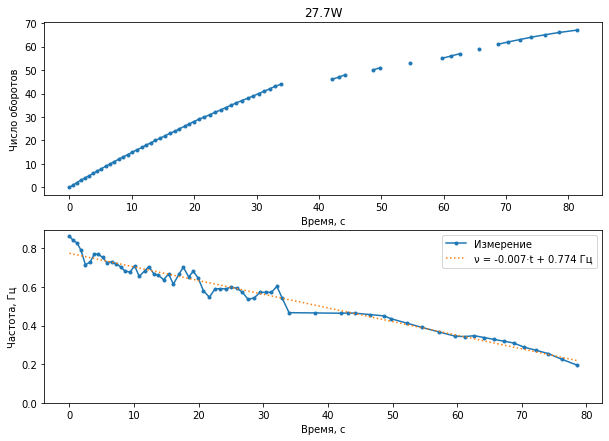

In [91]:
d = pd.read_csv("data/обращение", delimiter=";", comment = "#")
d['t'] = d['t'].apply(convert_time)
plot_coords(d, 'Оборотень', "27.7W", sm_w=2, approx=lambda x, B, C: B*x + C, approx_labeler=lambda B, C: f"ν = {B}·t + {C} Гц")

In [92]:
fill_nan(np.array([1, float('nan'), 2]))

array([1. , 1.5, 2. ])